# Objective
The objective of this project is practice my data cleaning skills.

In this project, I will play the role of data analyst and pretend my stakeholders want to know the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

# Data Sources
The data that I will be working with in the project is employee exit surveys that have been sourced from  Department of [Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

The data itself has been downloaded from [DataQuest](https://www.dataquest.io) directly as some modifications have been made for the purpose of this project.

The data is made up of two csv files; 
1. dete_survey.csv
2. tafe_survey.csv

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

# Data Exploration

## DETE data

### DETE data dictionary
For this project we will not be working with all of the fields so we are only capturing a limited data dictionary.

- `ID` An id used to identify the participant of the survey
- `SeparationType` The reason why the person's employment ended
- `Cease Date` The year or month the person's employment ended
- `DETE Start Date` The year the person began employment with the DETE


In [2]:
dete_survey.shape

(822, 56)

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
07/2014         2
02/2014         2
04/2013         2
04/2014         2
08/2012         2
09/2010         1
09/2014         1
2010            1
07/2012         1
07/2006         1
11/2012         1
2014            1
Name: Cease Date, dtype: int64

In [7]:
dete_survey['DETE Start Date'].value_counts()

Not Stated    73
2011          40
2007          34
2008          31
2012          27
2010          27
2009          24
2006          23
1975          21
2013          21
1970          21
1990          20
2005          20
1999          19
1996          19
1991          18
1992          18
2000          18
2004          18
1989          17
1976          15
1988          15
2003          15
2002          15
1978          15
1974          14
1979          14
1998          14
1995          14
1980          14
1997          14
1993          13
1972          12
1986          12
1977          11
2001          10
1984          10
1971          10
1969          10
1994          10
1983           9
1981           9
1973           8
1985           8
1987           7
1963           4
1982           4
1968           3
1967           2
1965           1
1966           1
Name: DETE Start Date, dtype: int64

## TAFE data

### TAFE Data Dictionary
For this project we will not be working with all of the fields so we are only capturing a limited data dictionary.

- `Record ID` An id used to identify the participant of the survey
- `Reason for ceasing employment` The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)` The length of the person's employment (in years)

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [11]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

# Data cleaning
### DETE
This dataset is made up of 822 rows of data. The key fields we are interested in include the following non-null value counts:
- `ID` 822 non-null values
- `SeparationType` 822 non-null values
- `Cease Date` 822 non-null values
- `DETE Start Date` 822 non-null values

On face value, it appears we have data in the key fields for the DETE dataset. However, when looking at the values in the two date fields, we can see that a number of entries are "not stated"
- `Cease Date` 34 "Not Stated"
- `DETE Start Date` 73 "Not Stated"
If these all relate to different rows of data, that means possibly 107 of the 822 rows (13%) cannot have am employment duration determined. We will have to explore this further to see which rows are affected and how we handle them.

### TAFE
This dataset is made up of 702 rows of data. The key fields we are interested in include the following non-null value counts:
- `Record ID` 702 non-null values
- `Reason for ceasing employment` 695 non-null values
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)` 596 non-null values

From this we can see that we are clearly missing data for both the "reason for ceasing" and the "lenght of service". We will have the explore how to handle these affected rows.

## Actions
1. Re-read in the DETE data to record the 'Not Stated' values as NaN
2. Drop columns in both datasets that we are not using
3. Rename the columns we are using in snake_case and so that they match between the datasets

In [12]:
# Action 1
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])
dete_survey['Cease Date'].value_counts()

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
07/2014      2
02/2014      2
04/2013      2
04/2014      2
08/2012      2
09/2010      1
09/2014      1
2010         1
07/2012      1
07/2006      1
11/2012      1
2014         1
Name: Cease Date, dtype: int64

In [13]:
# Action 2 - DETE
dete_survey_updated = dete_survey.drop(labels=dete_survey.columns[28:49], axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [14]:
# Action 2 - TAFE
tafe_survey_updated = tafe_survey.drop(labels=tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

In [15]:
# Action 3 - DETE
dete_columns_clean_names = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('/', '-')

dete_columns_clean_map = {}
for old, new in zip(dete_survey_updated.columns, dete_columns_clean_names):
    dete_columns_clean_map[old] = new

dete_survey_updated.rename(mapper=dete_columns_clean_map, axis=1, inplace=True)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

In [16]:
# Action 3 - TAFE part 1 - clean the column names
tafe_survey_updated.columns = tafe_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('/', '-').str.replace('?', '').str.replace('.', '')

tafe_survey_updated.columns

Index(['record_id', 'institute', 'workarea', 'cessation_year',
       'reason_for_ceasing_employment',
       'contributing_factors_career_move_-_public_sector',
       'contributing_factors_career_move_-_private_sector',
       'contributing_factors_career_move_-_self-employment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity-family',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none',
       'gender_what_is_your_gender', 'currentage_current_age',
       'employment_type_employment_type', 'classification_classification',
       'lengthofserviceoverall_overall_length_of_service_at_institute_(in_years)',
       'lengthofservicecurrent_length_of_service_at_current_workplace_(in_years)'],
      dtype='object')

In [17]:
# Action 3 - TAFE part 2 - replace the column names and align to DETE column names
tafe_columns_new_map = {}
for c in tafe_survey_updated.columns:
    tafe_columns_new_map[c] = c
    
tafe_columns_new_map

{'record_id': 'record_id',
 'institute': 'institute',
 'workarea': 'workarea',
 'cessation_year': 'cessation_year',
 'reason_for_ceasing_employment': 'reason_for_ceasing_employment',
 'contributing_factors_career_move_-_public_sector': 'contributing_factors_career_move_-_public_sector',
 'contributing_factors_career_move_-_private_sector': 'contributing_factors_career_move_-_private_sector',
 'contributing_factors_career_move_-_self-employment': 'contributing_factors_career_move_-_self-employment',
 'contributing_factors_ill_health': 'contributing_factors_ill_health',
 'contributing_factors_maternity-family': 'contributing_factors_maternity-family',
 'contributing_factors_dissatisfaction': 'contributing_factors_dissatisfaction',
 'contributing_factors_job_dissatisfaction': 'contributing_factors_job_dissatisfaction',
 'contributing_factors_interpersonal_conflict': 'contributing_factors_interpersonal_conflict',
 'contributing_factors_study': 'contributing_factors_study',
 'contributing_f

In [18]:
#Use the output above, paste below and update the map for the required changes
tafe_columns_new_map = {'record_id': 'id',
 'institute': 'institute',
 'workarea': 'workarea',
 'cessation_year': 'cease_date',
 'reason_for_ceasing_employment': 'separationtype',
 'contributing_factors_career_move_-_public_sector': 'contributing_factors_career_move_-_public_sector',
 'contributing_factors_career_move_-_private_sector': 'contributing_factors_career_move_-_private_sector',
 'contributing_factors_career_move_-_self-employment': 'contributing_factors_career_move_-_self-employment',
 'contributing_factors_ill_health': 'contributing_factors_ill_health',
 'contributing_factors_maternity-family': 'contributing_factors_maternity-family',
 'contributing_factors_dissatisfaction': 'contributing_factors_dissatisfaction',
 'contributing_factors_job_dissatisfaction': 'contributing_factors_job_dissatisfaction',
 'contributing_factors_interpersonal_conflict': 'contributing_factors_interpersonal_conflict',
 'contributing_factors_study': 'contributing_factors_study',
 'contributing_factors_travel': 'contributing_factors_travel',
 'contributing_factors_other': 'contributing_factors_other',
 'contributing_factors_none': 'contributing_factors_none',
 'gender_what_is_your_gender': 'gender',
 'currentage_current_age': 'age',
 'employment_type_employment_type': 'employment_type_employment_type',
 'classification_classification': 'position',
 'lengthofserviceoverall_overall_length_of_service_at_institute_(in_years)': 'institute_service',
 'lengthofservicecurrent_length_of_service_at_current_workplace_(in_years)': 'role_service'}

tafe_survey_updated.rename(mapper=tafe_columns_new_map, axis=1, inplace=True)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id                                                  702 non-null    float64
 1   institute                                           702 non-null    object 
 2   workarea                                            702 non-null    object 
 3   cease_date                                          695 non-null    float64
 4   separationtype                                      701 non-null    object 
 5   contributing_factors_career_move_-_public_sector    437 non-null    object 
 6   contributing_factors_career_move_-_private_sector   437 non-null    object 
 7   contributing_factors_career_move_-_self-employment  437 non-null    object 
 8   contributing_factors_ill_health                     437 non-null    object 
 9  

## Filter the data for rows relating only to 'resignations'

In [19]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [21]:
# create bool for dete

dete_resignation_bool = (dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | (dete_survey_updated['separationtype'] == 'Resignation-Other employer') | (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')

dete_resignation_bool.value_counts()

False    511
True     311
Name: separationtype, dtype: int64

In [22]:
# assign values for dete

dete_survey_updated.loc[dete_resignation_bool, 'resignation'] = 'Resignation'
dete_survey_updated.loc[~dete_resignation_bool, 'resignation'] = 'Not Resignation'

dete_survey_updated['resignation'].value_counts()

Not Resignation    511
Resignation        311
Name: resignation, dtype: int64

In [23]:
# assign values for tafe so data structure matches dete

tafe_resignation_bool = (tafe_survey_updated['separationtype'] == 'Resignation')

tafe_survey_updated.loc[tafe_resignation_bool, 'resignation'] = 'Resignation'
tafe_survey_updated.loc[~tafe_resignation_bool, 'resignation'] = 'Not Resignation'

tafe_survey_updated['resignation'].value_counts()

Not Resignation    362
Resignation        340
Name: resignation, dtype: int64

In [24]:
# select only the rows relating to resignations

dete_resignations = dete_survey_updated[dete_survey_updated['resignation']=='Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['resignation']=='Resignation'].copy()

print('Dete shape:', dete_resignations.shape)
print('Tafe shape:', tafe_resignations.shape)

Dete shape: (311, 36)
Tafe shape: (340, 24)


## Cleaning the resignation data

In [25]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [26]:
#remove the months from the `cease_date` in the dete data and convert to a float
dete_cease_year = dete_resignations['cease_date'].str.split(pat='/').str[-1]

dete_resignations['cease_date'] = dete_cease_year.astype('float64')

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [27]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [28]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

### Observations
Both the dete and tafe datasets now have columns with clean years. Note that for now the tafe dataset only has a `cease_date` and not a "start date" like the dete data, however it does have two columns relating to service length, which the dete data does not have.

What we can also see is that the tafe data only goes back to 2009 resignations, where as the dete date goes back to 2006. Based on the analysis we would like to do, this is acceptable.

### Create column in dete data for years of service (`institute_service`)

In [29]:
# years of service calculated as cease date minus start date

dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## Identify rows of data where the employee was 'dissatisfied'

tafe_resignations:
- `contributing_factors_dissatisfaction` "Contributing Factors. Dissatisfaction"
- `contributing_factors_job_dissatisfaction` "Job Dissatisfaction"

dete_resignations:
- `job_dissatisfaction` (bool)
- `dissatisfaction_with_the_department` (bool)
- `lack_of_recognition` (bool)
- `lack_of_job_security` (bool)
- `work_location` (bool)
- `employment_conditions` (bool)
- `work_life_balance` (bool)
- `workload` (bool)

In [30]:
tafe_resignations['contributing_factors_dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: contributing_factors_dissatisfaction, dtype: int64

In [31]:
tafe_resignations['contributing_factors_job_dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: contributing_factors_job_dissatisfaction, dtype: int64

### Alternative approach
Below is how I originally constructed a new `dissatisfied` column for both datasets, however the project guide has requested that I use a function and the df.applymap() method. I have therefore commented out my first approach in the interested of practicing the techniques recommended by the proejct guide.

In [32]:
# make the relevant tafe columns into a boolean

# bool_one = tafe_resignations['contributing_factors_dissatisfaction'].str.strip() == "Contributing Factors. Dissatisfaction"
# #bool_one.value_counts()

# tafe_resignations.loc[bool_one, 'contributing_factors_dissatisfaction'] = True
# tafe_resignations.loc[~bool_one, 'contributing_factors_dissatisfaction'] = False

# tafe_resignations['contributing_factors_dissatisfaction'].value_counts()

In [33]:
# bool_two = tafe_resignations['contributing_factors_job_dissatisfaction'].str.strip() == "Job Dissatisfaction"
# #bool_two.value_counts()

# tafe_resignations.loc[bool_two, 'contributing_factors_job_dissatisfaction'] = True
# tafe_resignations.loc[~bool_two, 'contributing_factors_job_dissatisfaction'] = False

# tafe_resignations['contributing_factors_job_dissatisfaction'].value_counts()

In [34]:
# tafe_resignations['dissatisfied'] = tafe_resignations[['contributing_factors_job_dissatisfaction',
#                                                       'contributing_factors_dissatisfaction']].any(axis=1,skipna=False)

# tafe_resignations['dissatisfied'].value_counts()

In [35]:
# dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
#                                                       'dissatisfaction_with_the_department',
#                                                       'lack_of_recognition',
#                                                       'lack_of_job_security',
#                                                         'work_location',
#                                                       'employment_conditions',
#                                                       'work_life_balance',
#                                                       'workload']].any(axis=1,skipna=False)

# dete_resignations['dissatisfied'].value_counts()

### Project guide approach

In [36]:
# function that can be used to update the values in the tafe columns to True, False or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True    

In [37]:
dissatisfaction_bools = tafe_resignations.loc[:,['contributing_factors_dissatisfaction', 'contributing_factors_job_dissatisfaction']].applymap(update_vals)

print(dissatisfaction_bools['contributing_factors_dissatisfaction'].value_counts(dropna=False))
print(dissatisfaction_bools['contributing_factors_job_dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: contributing_factors_dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: contributing_factors_job_dissatisfaction, dtype: int64


In [38]:
dissatisfaction_bools = dissatisfaction_bools.astype('bool')

In [39]:
dissatisfaction_bools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   contributing_factors_dissatisfaction      340 non-null    bool 
 1   contributing_factors_job_dissatisfaction  340 non-null    bool 
dtypes: bool(2)
memory usage: 3.3 KB


In [41]:
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'] = dissatisfaction_bools.any(axis=1, skipna=True)

tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

In [42]:
dete_resignations_up = dete_resignations.copy()

In [43]:
dete_resignations_up['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                      'dissatisfaction_with_the_department',
                                                      'lack_of_recognition',
                                                      'lack_of_job_security',
                                                        'work_location',
                                                      'employment_conditions',
                                                      'work_life_balance',
                                                      'workload']].any(axis=1,skipna=False)

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    163
True     148
Name: dissatisfied, dtype: int64

# Combining the data

In [45]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

print(dete_resignations_up['institute'].value_counts())
print(tafe_resignations_up['institute'].value_counts())

DETE    311
Name: institute, dtype: int64
TAFE    340
Name: institute, dtype: int64


In [47]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 54 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id                                                  651 non-null    float64
 1   separationtype                                      651 non-null    object 
 2   cease_date                                          635 non-null    float64
 3   dete_start_date                                     283 non-null    float64
 4   role_start_date                                     271 non-null    float64
 5   position                                            598 non-null    object 
 6   classification                                      161 non-null    object 
 7   region                                              265 non-null    object 
 8   business_unit                                       32 non-null     object 
 9  

<AxesSubplot:>

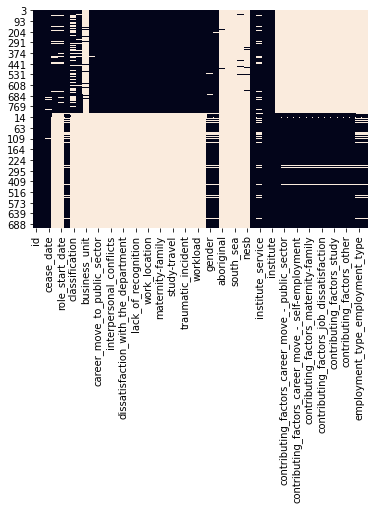

In [48]:
import seaborn as sns
sns.heatmap(combined.isnull(), cbar=False)

In [53]:
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   gender             592 non-null    object 
 5   age                596 non-null    object 
 6   resignation        651 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 51.5+ KB


<AxesSubplot:>

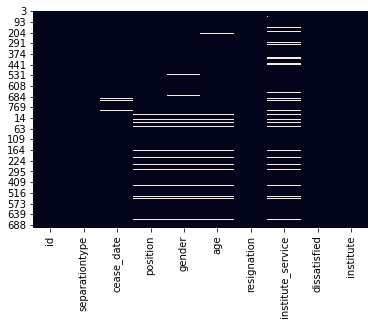

In [61]:
sns.heatmap(combined_updated.isnull(), cbar=False)